In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd


data = fetch_california_housing()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [4]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df.drop(columns=['Target'])
y = df['Target']

# Splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Missing values per column:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR()
}

# Train models and make predictions
predictions = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions[name] = model.predict(X_test_scaled)


In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Store results
results = {}
for name, y_pred in predictions.items():
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = [mse, mae, r2]

# Convert to DataFrame
results_df = pd.DataFrame(results, index=['MSE', 'MAE', 'R²']).T
print(results_df)


                               MSE       MAE        R²
Linear Regression         0.555892  0.533200  0.575788
Decision Tree             0.500964  0.456145  0.617704
Random Forest             0.255842  0.327417  0.804762
Gradient Boosting         0.293999  0.371650  0.775643
Support Vector Regressor  0.357004  0.398599  0.727563


C:\Users\USER\AppData\Local\Temp\ipykernel_10480\3717533538.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['R²'], palette='coolwarm')


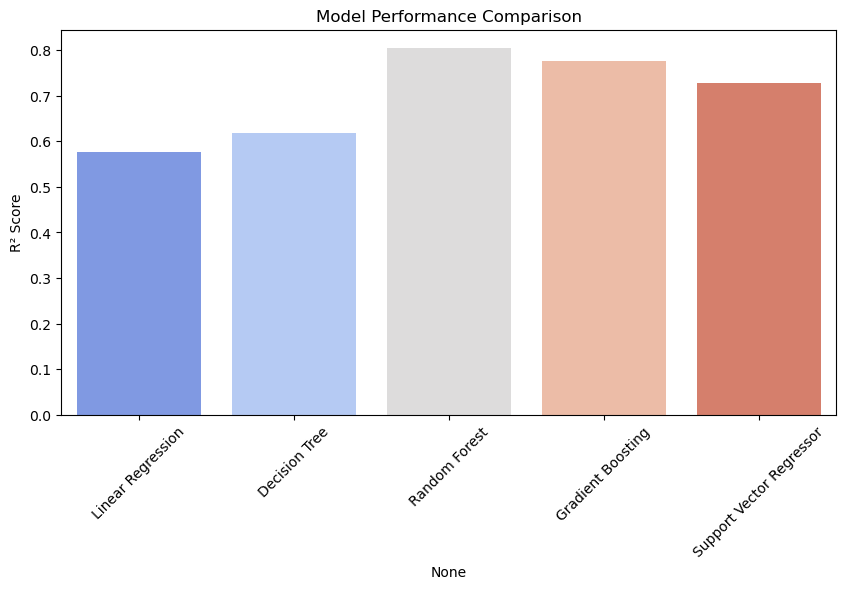

Best Performing Model: Random Forest
Worst Performing Model: Linear Regression


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot R² scores
plt.figure(figsize=(10,5))
sns.barplot(x=results_df.index, y=results_df['R²'], palette='coolwarm')
plt.ylabel("R² Score")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.show()

# Identify best and worst models
best_model = results_df['R²'].idxmax()
worst_model = results_df['R²'].idxmin()
print(f"Best Performing Model: {best_model}")
print(f"Worst Performing Model: {worst_model}")
